In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reddit Toxicity Ratings EDA

In [13]:
# Load data
data_path = os.path.join(os.pardir, 'raw_data', 'ruddit_comments_score.csv')
df = pd.read_csv(data_path)

In [14]:
df.head()

,comment_id,body,score
0,cza1q49,> The difference in average earnings between m...,-0.083
1,cza1wdh,"The myth is that the ""gap"" is entirely based o...",-0.022
2,cza23qx,[deleted],0.167
3,cza2bw8,The assertion is that women get paid less for ...,-0.146
4,cza2iji,You said in the OP that's not what they're mea...,-0.083


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comment_id  5966 non-null   object 
 1   body        5966 non-null   object 
 2   score       5966 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.0+ KB


In [16]:
df.describe()

,score
count,5966.000000
mean,-0.027558
std,0.334245
min,-0.889000
25%,-0.255000
50%,-0.062000
75%,0.167000
max,0.979000


In [17]:
# Count how many [deleted] comments there are
df[df['body'] == '[deleted]'].count()

comment_id    222
body          222
score         222
dtype: int64

In [18]:
# Might as well drop them because no useful information can be extracted
df = df[df['body'] != '[deleted]']

In [19]:
# Grab a random sample of comments and print em
sample = df.sample(10)

for _, row in sample.iterrows():
    print('Sentiment:', row['score'])
    print(row['body'])

Sentiment: 0.104
Reddit loves this clown, like she is not a politician lying through her teeth. 
Sentiment: -0.25
Say the government puts a price cap on textbooks. You’d get lower textbook prices, sure. But many people who would write a textbook if they could sell it for $100 won’t do it if they now have to sell it for $50. Fewer textbooks written will mean that overall textbook quality will decline. I’m not sure how else you’d regulate textbooks. I suppose the government could subsidize them, but it basically already does in the form of student aid. I can make similar arguments for pretty much any regulatory scheme you throw at me. Lower quality, higher prices, or both.
Sentiment: -0.354
The fact is that it's too little too late. Centrist democrats tend to give small incremental change making things slightly better overtime. (better in my worldview) this could be said about a centrist candidate on either side.
Sentiment: -0.188
No as in the Puritanical undercurrent of American culture

In [20]:
# Take a look at the best and worst comments
# Note: highest values are the worst comments
print("Worst comments")
print("-"*80)
for _, row in df.sort_values(by='score', ascending=False).head(10).iterrows():
    print('Sentiment:', row['score'])
    print(row['body'])
    
print("-"*80)
print("Best comments")
print("-"*80)
for _, row in df.sort_values(by='score', ascending=True).head(10).iterrows():
    print('Sentiment:', row['score'])
    print(row['body'])

Worst comments
--------------------------------------------------------------------------------
Sentiment: 0.979
Dumbass liberals.  You’d let anyone fuck you over.
Sentiment: 0.958
Yeah ok, shut the fuck up bitch. It’s Bernie or Bust 100% nobody is voting for Biden, now get the fuck out of here you cunt
Sentiment: 0.938
yeah you don’t know how it works, fuck off
Sentiment: 0.938
fuck you, you're just pretending to be blocked. get back to work RIGHT NOW you piece of shit piping
Sentiment: 0.938
If you stick your dick in crazy, the crazy sticks you
Sentiment: 0.938
"He's a borderline rapist and that's just what we know about.  He can't possibly win -- did you hear what he said about grabbing pussy?  ZERO percent chance.  He's a fucking trainwreck."

Me.  Before losing all faith in humanity.
Sentiment: 0.938
Your monstrosity of a forehead almost distracted me from that atrocious hoodie/vest/whatever-the-fuck-it-is top.
Sentiment: 0.938
nah fuck that. we need war , climate disaster and hop

<AxesSubplot:xlabel='score', ylabel='Count'>

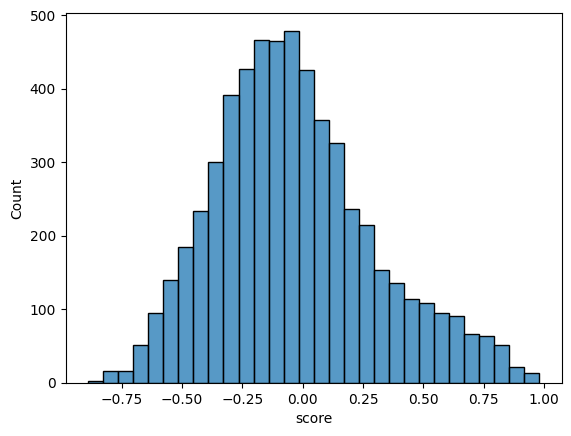

In [21]:
# Range of scores
sns.histplot(df['score'], bins=30)

# Reddit Comments Scores EDA

In [22]:
# Load up the dataframes
pos_path = os.path.join(os.pardir, 'raw_data', 'comments_positive.csv')
neg_path = os.path.join(os.pardir, 'raw_data', 'comments_negative.csv')

df_pos = pd.read_csv(pos_path)
df_neg = pd.read_csv(neg_path)

In [23]:
# Merge the dataframes because why are they even separate
df_2 = pd.concat([df_pos, df_neg])

In [24]:
df_2.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 0 to 1999999
Data columns (total 15 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       object
 1   parent_id                object
 2   subreddit_id             object
 3   link_id                  object
 4   text                     object
 5   score                    int64 
 6   ups                      int64 
 7   author                   object
 8   controversiality         int64 
 9   parent_link_id           object
 10  parent_text              object
 11  parent_score             int64 
 12  parent_ups               int64 
 13  parent_author            object
 14  parent_controversiality  int64 
dtypes: int64(6), object(9)
memory usage: 488.3+ MB


In [26]:
df_2.describe()

,score,ups,controversiality,parent_score,parent_ups,parent_controversiality
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,9.189241e+01,9.189241e+01,8.262500e-04,2.185056e+02,2.185056e+02,1.706750e-03
std,2.117502e+02,2.117502e+02,2.873269e-02,4.340878e+02,4.340878e+02,4.127757e-02
min,-2.946000e+03,-2.946000e+03,0.000000e+00,-8.907000e+03,-8.907000e+03,0.000000e+00
25%,-1.000000e+01,-1.000000e+01,0.000000e+00,1.300000e+01,1.300000e+01,0.000000e+00
50%,3.000000e+01,3.000000e+01,0.000000e+00,6.600000e+01,6.600000e+01,0.000000e+00
75%,1.160000e+02,1.160000e+02,0.000000e+00,2.250000e+02,2.250000e+02,0.000000e+00
max,9.582000e+03,9.582000e+03,1.000000e+00,1.477600e+04,1.477600e+04,1.000000e+00


In [27]:
# Are there any deleted comments? (No)
df_2[df_2['text'] == '[deleted]'].count()

id                         0
parent_id                  0
subreddit_id               0
link_id                    0
text                       0
score                      0
ups                        0
author                     0
controversiality           0
parent_link_id             0
parent_text                0
parent_score               0
parent_ups                 0
parent_author              0
parent_controversiality    0
dtype: int64

In [28]:
# Normalise the scores to make them between -1 and 1
# This is actually not so simple because positive comments and negative comments should be normalised separately
mask = df_2['score'] > 0
df_2.loc[mask, 'score_norm'] = df_2[mask]['score'] / df_2[mask]['score'].max()
df_2.loc[~mask, 'score_norm'] = df_2[~mask]['score'] / abs(df_2[~mask]['score'].min())

In [29]:
df_2['score_norm'].describe()

count    4.000000e+06
mean     7.870814e-03
std      2.331474e-02
min     -1.000000e+00
25%     -3.394433e-03
50%      2.425627e-03
75%      1.210603e-02
max      1.000000e+00
Name: score_norm, dtype: float64

<AxesSubplot:xlabel='score_norm', ylabel='Count'>

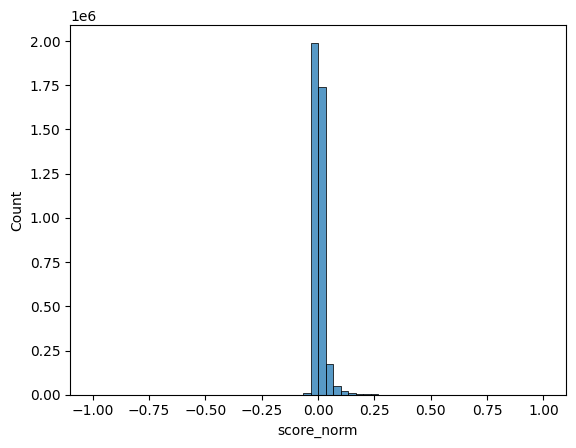

In [30]:
# Plot the scores
sns.histplot(df_2['score_norm'], bins=60)

In [31]:
# This poses a problem because many scores are around 0 and provide very little information
# Maybe the upvote / score ratio is more useful? The higher this is the more upvotes there are
# We would also need to balance this so that comments with very little upvotes are not overrepresented
df_2['upvote_ratio'] = df_2['score'] / df_2['ups']

In [32]:
# Well that's very fucking useful why are there even two columns then?
df_2[df_2['upvote_ratio'] != 1].count()

id                         0
parent_id                  0
subreddit_id               0
link_id                    0
text                       0
score                      0
ups                        0
author                     0
controversiality           0
parent_link_id             0
parent_text                0
parent_score               0
parent_ups                 0
parent_author              0
parent_controversiality    0
score_norm                 0
upvote_ratio               0
dtype: int64

In [33]:
# Show most and least negative comments
print("Worst comments")
print("-"*80)
for _, row in df_2.sort_values('score', ascending=True).head(10).iterrows():
    print('Score', row['score_norm'])
    print(row['text'])

print("-"*80)
print("Best comments")
print("-"*80)
for _, row in df_2.sort_values('score', ascending=False).head(10).iterrows():
    print('Score', row['score_norm'])
    print(row['text'])

Worst comments
--------------------------------------------------------------------------------
Score -1.0
Na, not really. 

I just hate islam and everything it stands for. 

I don't want to share my streets, schools, stores, or any place else that I frequent, with muslims. They are beneath me and don't deserve to inhabit my country. 

I am sick of "diversity" and the poverty, crime, and lower standard of living that comes along with it. 

I am sick of leftist morons that keep trying to shove it down our throats yet it is painfully obvious to everyone these people do not belong in a civilized society. 

Do you think it's a coincidence the places they hail from are complete cesspools? It is because their culture is inferior to ours. 

They run from the mess they have created of their own homeland and instead of realizing their culture is inferior, they attempt to import their failed way of life into my country. 

They are slowly but surely destroying this country. It's spreading like ca

: 